# World Internet Status

### This is an exploratory project that compares the internet speeds of various world economies. 

Economic data is in the form of per capita income from the [World Bank](http://databank.worldbank.org/data/reports.aspx?Code=NY.GDP.PCAP.CD&id=af3ce82b&report_name=Popular_indicators&populartype=series&ispopular=y#). Note that the World Bank data had gone through quite a lot of cleaning, including removing rows with non-NaN, non-numeric values, or any other values which don't play nice with Python.

The internet speeds and users datasets are downloaded from [Akamai](https://www.akamai.com/us/en/our-thinking/state-of-the-internet-report/).

### <center> I. Import Python Libraries </center></font>

In [31]:
%matplotlib inline
import pandas as pd
import numpy as np

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as grd
import matplotlib.ticker as tkr
import matplotlib.font_manager as font_manager

from matplotlib.ticker import AutoMinorLocator
from matplotlib.ticker import FuncFormatter
from matplotlib import rcParams

#define plotter
minorLocatorx   = AutoMinorLocator(10)
minorLocatory   = AutoMinorLocator(4)
matplotlib.rc('xtick', labelsize=16) 
matplotlib.rc('ytick', labelsize=16) 
matplotlib.rcParams['axes.linewidth'] = 2.
plt.rcParams['axes.linewidth'] = 4
plt.rc('font', family='serif')
plt.rc('font', serif='Times New Roman') 
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

In [32]:
# Try to make nice displays of Pandas tables.
#Font style
from IPython.core.display import HTML
css = open('/Users/gmsardane/nikola-blog/stories/style-table.css').read() \
+ open('/Users/gmsardane/nikola-blog/stories/style-notebook.css').read()
HTML('<style>{}</style>'.format(css));

### <center> 2. Load in GDP per capita data. </center> </font>

In [116]:
## World GDP
GDP = pd.read_csv('/Users/gmsardane/datascience_project/PhilippineInternetUsers/'+\
                  'Exploring-the-state-of-the-Internet-in-Various-Economies/GDP_percapita.csv')
#GDP = GDP.drop(GDP.columns[[0,1,3, -1]], axis=1)
GDP = GDP.set_index(['Country Name','Country Code']).dropna()
GDP = GDP.apply(pd.to_numeric, args=('coerce',))
GDP = GDP.reset_index()
year=[]
t=list(GDP.keys())
for word in t:
    year.append(word.split()[0])
GDP.head()

,Country Name,Country Code,2000 [YR2000],2001 [YR2001],2002 [YR2002],2003 [YR2003],2004 [YR2004],2005 [YR2005],2006 [YR2006],2007 [YR2007],2008 [YR2008],2009 [YR2009],2010 [YR2010],2011 [YR2011],2012 [YR2012],2013 [YR2013],2014 [YR2014]
0,Afghanistan,AFG,NaN,119.899037,192.153528,203.651041,224.914712,257.175795,280.245644,380.400955,384.131681,458.955782,569.940729,622.379654,690.842629,666.795051,633.569247
1,Albania,ALB,1175.788981,1326.970339,1453.642777,1890.681557,2416.588235,2709.142931,3005.012903,3603.013685,4370.539647,4114.136545,4094.358832,4437.811999,4247.485437,4411.258241,4564.390339
2,Algeria,DZA,1757.011974,1732.958517,1774.292021,2094.893302,2600.006520,3102.037384,3467.544740,3939.559939,4912.251941,3875.822095,4473.486446,5447.403976,5583.616160,5491.614414,5484.066806
3,American Samoa,ASM,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Andorra,ADO,21432.960070,21897.662940,24175.372750,31742.992580,37235.450030,39990.330410,42417.229150,47253.529800,46735.999570,42701.447140,39639.386020,41630.052580,39666.369210,42806.522550,NaN


### <center> Also load in the GDP ranking data. </center> </font>

In [111]:
## GDP Rank
GDP_rank = pd.read_csv('GDP.csv')
#GDP_rank = GDP_rank.set_index(['Country'])
GDP_rank = GDP_rank.sort_values(['Country'])
GDP_rank.head(5)

,Country Code,Rank,Country,USD_GDP
107,AFG,108,Afghanistan,20038
126,ALB,127,Albania,13212
48,DZA,49,Algeria,213518
161,ADO,162,Andorra,3249
57,AGO,58,Angola,138357


### <center> 3. Loading the Internet user and speed data from varios nations. </center> </font>

In [101]:
## Internet speed
speed = pd.read_csv('WorldInternetSpeedQ42014.txt')
#speed = speed.set_index('Region')
#speed=speed.sort_index()
speed.head()

,Region,Unique IPv4 Addresses,Average Connection Speed(Mbps),Average Peak Connection Speed (Mbps),Pct Above 4Mbps,Pct Above 10 Mbps,Pct Above 15 Mbps
0,Argentina,8199701,4.7,28.5,46.0,4.4,0.7
1,Bolivia,279921,2.0,13.2,3.3,0.3,0.1
2,Brazil,47913625,4.1,30.3,39.0,2.9,0.8
3,Canada,14924241,13.1,54.9,88.0,49.0,27.0
4,Chile,4750333,6.1,44.7,67.0,10.0,2.7


In [102]:
## Internet users
users = pd.read_csv('WorldInternetUsers2014.txt')
users = users.drop(users.columns[[0]], axis=1)
#users = users.set_index('Country')
#users = users.sort_index()
users.head(5)

,Country,Users,Penetration_percent,Population,Non-Users,Change_from_prev_yr_percent,Change_from_prev_yr_num,Population_Change_percent
0,Afghanistan,2020998,6.4,31627506,29606508,11.6,210730,3.08
1,Albania,1736695,60.1,2889676,1152981,5.3,87459,0.22
2,Algeria,7043221,18.1,38934334,31891113,11.8,742509,1.96
3,Andorra,69802,95.9,72786,2984,-2.2,-1546,-4.11
4,Angola,5150772,21.3,24227524,19076752,15.0,672165,3.32


### <center> 3. Merging the economic and tech data. </center> </font>

In [117]:
## Merging speeds and users data.
dfMerged = pd.merge(users, speed, right_on=['Region'], left_on=['Country'], how='inner')
dfMerged.drop('Region', axis=1, inplace=True)
print dfMerged.keys()

Index([u'Country', u'Users', u'Penetration_percent', u'Population',
       u'Non-Users', u'Change_from_prev_yr_percent',
       u'Change_from_prev_yr_num', u'Population_Change_percent',
       u'Unique IPv4 Addresses', u'Average Connection Speed(Mbps)',
       u'Average Peak Connection Speed (Mbps)', u'Pct Above 4Mbps',
       u' Pct Above 10 Mbps', u' Pct Above 15 Mbps'],
      dtype='object')


In [118]:
## Merging tech data with economic data
dfMerged = pd.merge(dfMerged, GDP, right_on=['Country Name'], left_on=['Country'], how='outer')
print(dfMerged.keys())
print 
print "\t \t \t There are {} countries having both economic, but not all have, tech data available.".format(len(dfMerged))

Index([u'Country', u'Users', u'Penetration_percent', u'Population',
       u'Non-Users', u'Change_from_prev_yr_percent',
       u'Change_from_prev_yr_num', u'Population_Change_percent',
       u'Unique IPv4 Addresses', u'Average Connection Speed(Mbps)',
       u'Average Peak Connection Speed (Mbps)', u'Pct Above 4Mbps',
       u' Pct Above 10 Mbps', u' Pct Above 15 Mbps', u'Country Name',
       u'Country Code', u'2000 [YR2000]', u'2001 [YR2001]', u'2002 [YR2002]',
       u'2003 [YR2003]', u'2004 [YR2004]', u'2005 [YR2005]', u'2006 [YR2006]',
       u'2007 [YR2007]', u'2008 [YR2008]', u'2009 [YR2009]', u'2010 [YR2010]',
       u'2011 [YR2011]', u'2012 [YR2012]', u'2013 [YR2013]', u'2014 [YR2014]'],
      dtype='object')

	 	 	 There are 246 countries having both economic, but not all have, tech data available.


                   Results: Weigthed least squares
Model:              WLS                 Adj. R-squared:     0.842   
Dependent Variable: Penetration_percent AIC:                379.4977
Date:               2016-09-13 22:40    BIC:                383.4383
No. Observations:   53                  Log-Likelihood:     -187.75 
Df Model:           1                   F-statistic:        277.2   
Df Residuals:       51                  Prob (F-statistic): 2.91e-22
R-squared:          0.845               Scale:              72.635  
--------------------------------------------------------------------
                 Coef.   Std.Err.    t     P>|t|    [0.025   0.975] 
--------------------------------------------------------------------
const          -116.6298  11.0863 -10.5202 0.0000 -138.8865 -94.3731
2014 [YR2014]    43.0889   2.5882  16.6479 0.0000   37.8927  48.2850
--------------------------------------------------------------------
Omnibus:               0.022         Durbin-Watson: 

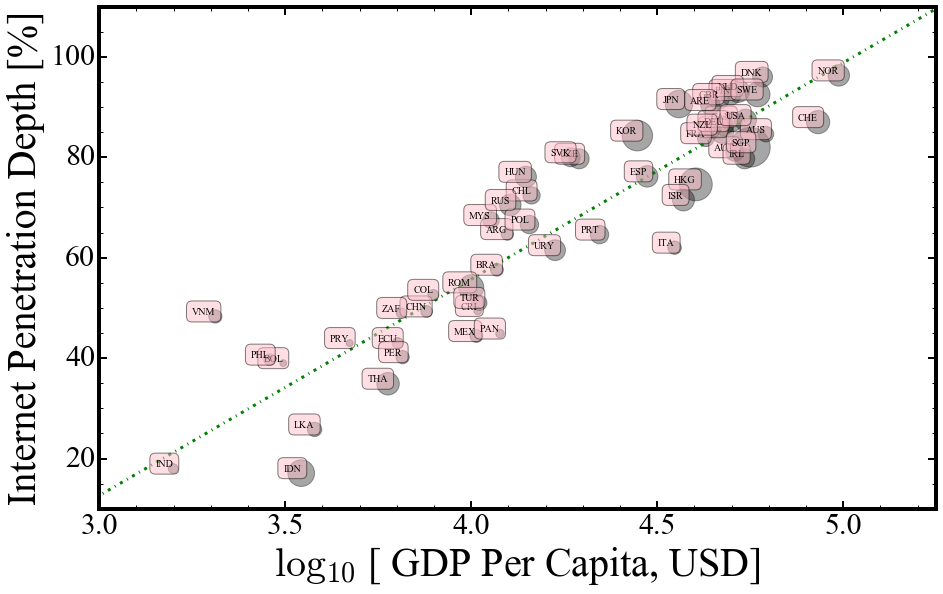

In [119]:
plt.scatter(np.log10(dfMerged.dropna()['2014 [YR2014]']), dfMerged.dropna()['Penetration_percent'], 
            s = dfMerged.dropna()['Average Peak Connection Speed (Mbps)']**1.50, alpha=0.35, 
            c='black', cmap = plt.get_cmap('Spectral'))
ax = plt.gca()
plt.xlabel(r'$\mathrm{log_{10}}$ [ GDP Per Capita, USD]', fontsize = 40)
plt.ylabel('Internet Penetration Depth [%]', fontsize = 40)
plt.ylim(10, 110)
plt.xlim(3, 5.25)
ax.minorticks_on()
ax.tick_params(axis='both',color='k',length=8,width=2, labelsize=30)
ax.tick_params(which='minor',axis='both', color='k',length=4,width=1)

#dfMerged_fit = dfMerged.dropna()

for label, x, y in zip(dfMerged.dropna()['Country Code'], np.log10(dfMerged.dropna()['2014 [YR2014]']), 
                       dfMerged.dropna()['Penetration_percent']):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (0, 0),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.55', fc = 'pink', alpha = 0.5))
        #arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))
## I want to add a regression line:
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std

## Fit a line through these points.
model = sm.WLS(dfMerged.dropna()['Penetration_percent'], sm.add_constant(np.log10(dfMerged.dropna()['2014 [YR2014]'])))
fitted = model.fit()
sdev, lower, upper = wls_prediction_std(fitted)
x = np.arange(0.0001, np.max(np.log10(dfMerged['2014 [YR2014]']))+5, 0.1)
plt.plot(x, fitted.params[0] + x*fitted.params[1], 'g-.', linewidth=3)
print fitted.summary2()
#ax.set_xscale('log')


## Notes and Observation:

> The **Penetration Depth** is the fraction of the **TOTAL POPULATION** who had access to an internet connection, in some way(?).

> There looks like a linear relationship between the penetration depth and the per capita GDP of the populace. Moreover, the size of the circles is representative of the **Average Peak Connection Speed**. Thus, wealthier countries not only have larger internet reach, but also faster connections, on average. Somehow, this makes sense since the wealthier nations can afford better technological infrastructure, and that more of its people can afford better internet access. This does not mean that *because of better access/connectivity*, these nations are wealthier. Another relevant question is, how does the quality of internet access vary across these economies?

## <center> Create a visualization of Internet Speeds of the World </center> </font>

#### The code below from the [example](https://plot.ly/python/choropleth-maps/).

In [120]:
import warnings
import plotly.plotly as py
warnings.filterwarnings("ignore")

def map_plotter(df, feature_x, feature_y = 'Average Connection Speed(Mbps)', year='2014', plot_title = 'Avg Speed'):
    if feature_y in df.keys():  
        data = [ dict(
                type = 'choropleth',
                locations = df[feature_x],
                z = df[feature_y],
                text = df['Country'],
                colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], \
                            [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], \
                            [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
                autocolorscale = False,
                reversescale = True,
                marker = dict(
                    line = dict (
                        color = 'rgb(180,180,180)',
                        width = 0.5
                    ) ),
                colorbar = dict(
                    autotick = False,
                    tickprefix = '',
                    title = plot_title + ' <br>Mbps'),
              ) ]
        
        layout = dict(
            title = year + ' Global ' + feature_y + ' <br>Source:\
                    <a href="https://www.akamai.com/us/en/about/news/press/2015-press/'+\
            'akamai-releases-fourth-quarter-2014-state-of-the-internet-report.jsp">\
                    State of the Internet</a>',
            geo = dict(
                showframe = False,
                showcoastlines = False,
                projection = dict(
                    type = 'Mercator'
                )
            )
        )
        
        fig = dict( data=data, layout=layout )
        py.iplot( fig, validate=False, filename='d3-world-map' )
#py.image.save_as(fig, filename='World_Map_Internet_Speed.png')
        py.image.ishow(fig)
    else:
        print 'Feature not in dataframe! Check your spelling.'

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lovelyquark/0 or inside your plot.ly account where it is named 'd3-world-map'


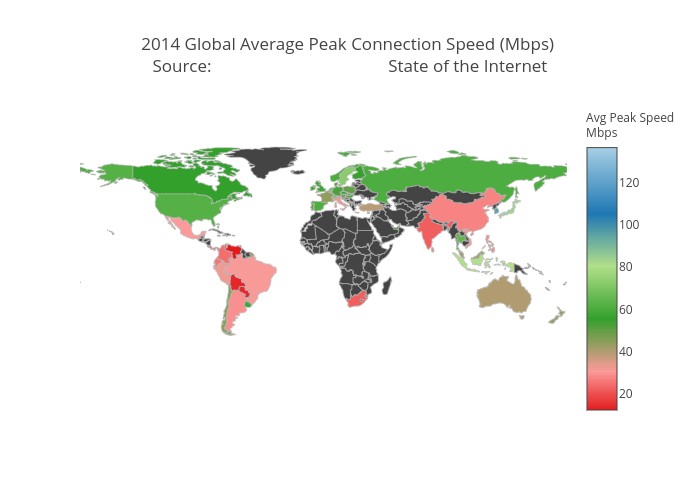

In [121]:
map_plotter(dfMerged, 'Country Code', 'Average Peak Connection Speed (Mbps)', '2014', 'Avg Peak Speed')

High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lovelyquark/0 or inside your plot.ly account where it is named 'd3-world-map'


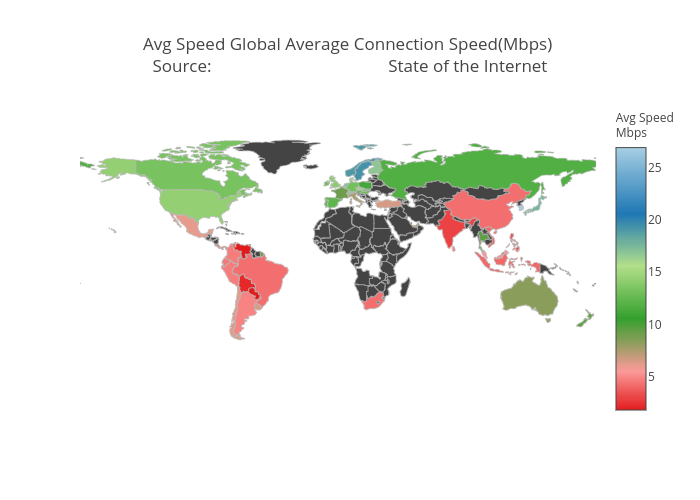

In [86]:
map_plotter(dfMerged, 'Country Code', 'Average Connection Speed(Mbps)', 'Avg Speed')

> Wealthier countries are in the green zone! Poorer countries are in the red zone. But the poorest are very **DARK**!

### Consistency as the ratio of peak average speed to average speed.

In [122]:
data = [ dict(
                type = 'choropleth',
                locations = dfMerged['Country Code'],
                z = dfMerged['Average Connection Speed(Mbps)']/dfMerged['Average Peak Connection Speed (Mbps)'],
                text = dfMerged['Country'],
                colorscale=[[0, 'rgb(166,206,227)'], [0.25, 'rgb(31,120,180)'], \
                            [0.45, 'rgb(178,223,138)'], [0.65, 'rgb(51,160,44)'], \
                            [0.85, 'rgb(251,154,153)'], [1, 'rgb(227,26,28)']],
                autocolorscale = False,
                reversescale = True,
                marker = dict(
                    line = dict (
                        color = 'rgb(180,180,180)',
                        width = 0.5
                    ) ),
                colorbar = dict(
                    autotick = False,
                    tickprefix = '',
                    title = 'Ratio <br>Mbps'),
              ) ]
        
layout = dict(
            title = '2014 Global Consistency <br>Source:\
                    <a href="https://www.akamai.com/us/en/about/news/press/2015-press/akamai-releases-fourth-quarter-2014-state-of-the-internet-report.jsp">\
                    State of the Internet</a>',
            geo = dict(
                showframe = False,
                showcoastlines = False,
                projection = dict(
                    type = 'Mercator'
                )
            )
        )
        
fig = dict( data=data, layout=layout )
py.iplot( fig, validate=False, filename='d3-world-map_Internet_ratios' )
#py.image.ishow(fig)

> The heat map above indicates that the average speed is only, at best, about $\frac{1}{3}$ of the peak speed.

##  Updating with Q1 2016 data from [Akamai](https://www.akamai.com/us/en/multimedia/documents/state-of-the-internet/akamai-state-of-the-internet-report-q1-2016.pdf)

In [123]:
speed2016 = pd.read_csv('WorldInternetSpeedQ12016.txt')
speed2016 = speed2016.drop(['Country Code'],1)
dfMerged2016 = pd.merge(speed2016, GDP, right_on=['Country Name'], left_on=['Country'], how='outer')
print(dfMerged2016.keys())
print 
print "\t \t \t There are {} countries having both economic, but not all have, tech data available.".format(len(dfMerged2016))

Index([u'Country', u'Unique IPv4 Addresses', u'Average Connection Speed(Mbps)',
       u'Average Peak Connection Speed (Mbps)', u'Pct Above 4Mbps',
       u' Pct Above 10 Mbps', u' Pct Above 15 Mbps', u'Country Name',
       u'Country Code', u'2000 [YR2000]', u'2001 [YR2001]', u'2002 [YR2002]',
       u'2003 [YR2003]', u'2004 [YR2004]', u'2005 [YR2005]', u'2006 [YR2006]',
       u'2007 [YR2007]', u'2008 [YR2008]', u'2009 [YR2009]', u'2010 [YR2010]',
       u'2011 [YR2011]', u'2012 [YR2012]', u'2013 [YR2013]', u'2014 [YR2014]'],
      dtype='object')

	 	 	 There are 249 countries having both economic, but not all have, tech data available.


High five! You successfuly sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~lovelyquark/0 or inside your plot.ly account where it is named 'd3-world-map'


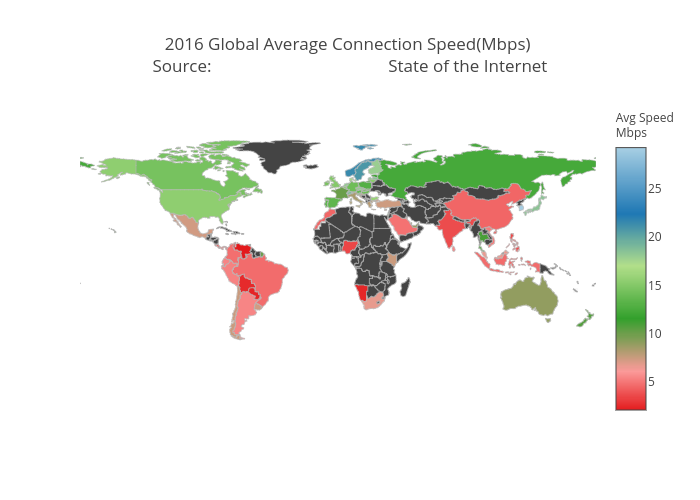

In [124]:
map_plotter(dfMerged2016, 'Country Code', 'Average Connection Speed(Mbps)', '2016', 'Avg Speed')